# Mardi Gras Routes Exploring

API Doc:  https://dev.socrata.com/foundry/data.nola.gov/tkeu-9s5e
Resource:  https://data.nola.gov/resource/tkeu-9s5e.json

General exploration of datasets expect this to be deleted

Seriously this is scratch work im just trying to figure out whats going on before i decide what to do

In [1]:
import geopandas  as gpd
import pandas as pd
import geoplot as gplt
import geoplot.crs as gcrs
import os
import numpy as np
import shapely
import icalendar
from datetime import datetime

In [2]:
with open("datasets/MardiGrasSchedule2026.ics","r") as icalFile:
    calendar = icalendar.Calendar.from_ical(icalFile.read())


calDicts = []
for event in calendar.events:
    calDicts.append({
        
        'CalStart':event.DTSTART,
        'parade':str(event['SUMMARY'])

    })

calDf = pd.DataFrame.from_dict(calDicts)
calDf['parade'] = calDf['parade'].str.replace('Krewe of ','')
calDf['CalStart'] = pd.to_datetime(calDf['CalStart']).dt.tz_convert('America/Chicago')
calDf = calDf[calDf['CalStart'] > '2026-01-01'].copy()

calDf.set_index('parade',inplace=True)

calDf.head()

,CalStart
parade,
Choctaw,2026-02-07 12:30:00-06:00
Endymion,2026-02-14 16:00:00-06:00
Cork,2026-02-06 15:00:00-06:00
Muses,2026-02-12 18:00:00-06:00
Symphony,2026-02-12 18:30:00-06:00


In [3]:
sorted(calDf.index.to_list())

["'tit Rex",
 'Alla',
 'Argus',
 'Athena',
 'Atlas',
 'Atlas',
 'Bacchus',
 'Barkus (WALKING DOG PARADE)',
 'Boheme ',
 'Bosom Buddies',
 'Carrollton',
 'Centurions',
 'Chewbacchus',
 'Choctaw',
 'Cleopatra',
 'Cork ',
 'Crescent City',
 'Druids',
 'Elks Jefferson',
 'Elks Orleans',
 'Endymion',
 'Excalibur',
 'Freret',
 'Funky Uptown Krewe ',
 'Hermes',
 'Iris',
 'Isis',
 'Joan of Arc Parade',
 'King Author',
 'Kings',
 'Knights of Babylon',
 'Knights of Chaos',
 'Knights of Nemesis',
 'Knights of Sparta/Spartan Society',
 "Krewe d'Etat",
 'Krewe du Vieux ',
 'Krewedelusion',
 'Legion of Mars',
 'Little Rascals',
 'Magical Mad Hatters',
 'Mid City',
 'Morpheus',
 'Muses',
 'Music',
 'Mystic Femme Fatale',
 'NOMTOC',
 'Nandi',
 'Nefertiti',
 'Okeanos',
 'Olympia',
 'Orpheus',
 'Oshun',
 'Phunny Phorty Phellows',
 'Pontchartrain',
 'Proteus',
 'Pygmalion',
 'REX',
 'Symphony',
 'Thoth',
 'Tucks',
 'Zulu']

In [4]:
calDf.shape

(61, 1)

In [5]:
path = f"{os.curdir}{os.sep}datasets{os.sep}"
path

'./datasets/'

In [6]:
data = gpd.read_file(f"{path}paradeRoutes2026.geojson")

In [7]:
data.head()

,location,numfloats,formation,disband,objectid,date,time,parade,shape_stlength,day,geometry
0,Uptown,None,Jefferson and Magazine,Canal and Magazine,24,2026-02-15 11:45:00+00:00,11:45am,Mid-City,22589.422317606117,2nd Sunday,"MULTILINESTRING ((-90.11498 29.92087, -90.1148..."
1,Uptown,None,Napoleon and Magazine,Canal and Roosevelt Way,17,2026-02-12 16:30:00+00:00,4:30pm,Chaos,18801.130441472782,2nd Thursday,"MULTILINESTRING ((-90.10137 29.92082, -90.1018..."
2,Downtown,None,Marigny and Decatur,Andrew Higgins and S. Peters,34,2026-01-31 19:00:00+00:00,7:00pm,Krewe Du Vieux,15476.953108061272,Walking Parade,"MULTILINESTRING ((-90.05506 29.96271, -90.0551..."
3,Uptown,None,Jefferson and Magazine,Poydras and Tchoupitoulas,8,2026-02-07 17:30:00+00:00,5:30pm,Sparta,24095.054495989403,1st Saturday,"MULTILINESTRING ((-90.11498 29.92087, -90.1137..."
4,Uptown,None,Napoleon and Tchoupitoulas,Poydras and Tchoupitoulas,7,2026-02-07 15:30:00+00:00,3:30pm,Freret,21281.640909080972,1st Saturday,"MULTILINESTRING ((-90.10098 29.91716, -90.101 ..."


<Axes: >

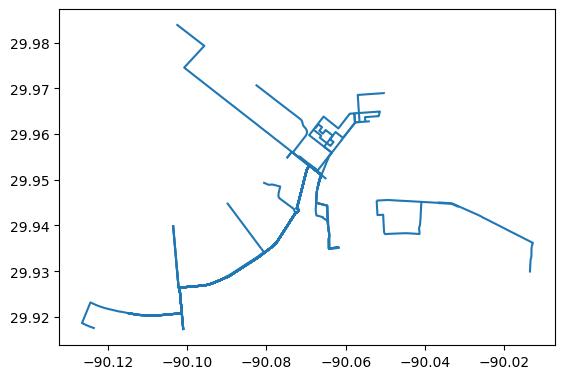

In [8]:
data.plot()

In [9]:
data.join(calDf, on='parade')

,location,numfloats,formation,disband,objectid,date,time,parade,shape_stlength,day,geometry,CalStart
0,Uptown,None,Jefferson and Magazine,Canal and Magazine,24,2026-02-15 11:45:00+00:00,11:45am,Mid-City,22589.422317606117,2nd Sunday,"MULTILINESTRING ((-90.11498 29.92087, -90.1148...",NaT
1,Uptown,None,Napoleon and Magazine,Canal and Roosevelt Way,17,2026-02-12 16:30:00+00:00,4:30pm,Chaos,18801.130441472782,2nd Thursday,"MULTILINESTRING ((-90.10137 29.92082, -90.1018...",NaT
2,Downtown,None,Marigny and Decatur,Andrew Higgins and S. Peters,34,2026-01-31 19:00:00+00:00,7:00pm,Krewe Du Vieux,15476.953108061272,Walking Parade,"MULTILINESTRING ((-90.05506 29.96271, -90.0551...",NaT
3,Uptown,None,Jefferson and Magazine,Poydras and Tchoupitoulas,8,2026-02-07 17:30:00+00:00,5:30pm,Sparta,24095.054495989403,1st Saturday,"MULTILINESTRING ((-90.11498 29.92087, -90.1137...",NaT
4,Uptown,None,Napoleon and Tchoupitoulas,Poydras and Tchoupitoulas,7,2026-02-07 15:30:00+00:00,3:30pm,Freret,21281.640909080972,1st Saturday,"MULTILINESTRING ((-90.10098 29.91716, -90.101 ...",2026-02-07 13:00:00-06:00
5,Uptown,None,Napoleon and Claiborne,Poydras and Claiborne,30,2026-02-17 11:00:00+00:00,11:00am,Elks,23146.132718530014,Fat Tuesday,"MULTILINESTRING ((-90.07489 29.9547, -90.07363...",NaT
6,Uptown,None,Jefferson and Magazine,Canal and Dorsiere,19,2026-02-13 18:30:00+00:00,6:30pm,D'etat,22827.583959680087,2nd Friday,"MULTILINESTRING ((-90.11498 29.92087, -90.1137...",NaT
7,Uptown,None,Jefferson and Magazine,Poydras and Tchoupitoulas,16,2026-02-12 18:15:00+00:00,6:15pm,Muses,24162.348881899132,2nd Thursday,"MULTILINESTRING ((-90.11498 29.92087, -90.1148...",2026-02-12 18:00:00-06:00
8,Uptown,None,Napoleon and Tchoupitoulas,Poydras and Tchoupitoulas,4,2026-02-06 18:00:00+00:00,6:00pm,Cleopatra,21161.075592614441,1st Friday,"MULTILINESTRING ((-90.10098 29.91716, -90.101 ...",2026-02-06 18:00:00-06:00
9,Uptown,None,Napoleon and Tchoupitoulas,Poydras and Tchoupitoulas,22,2026-02-14 12:00:00+00:00,12:00pm,Tucks,21095.835274003577,2nd Saturday,"MULTILINESTRING ((-90.10098 29.91716, -90.101 ...",2026-02-14 12:00:00-06:00


<GeoAxes: >

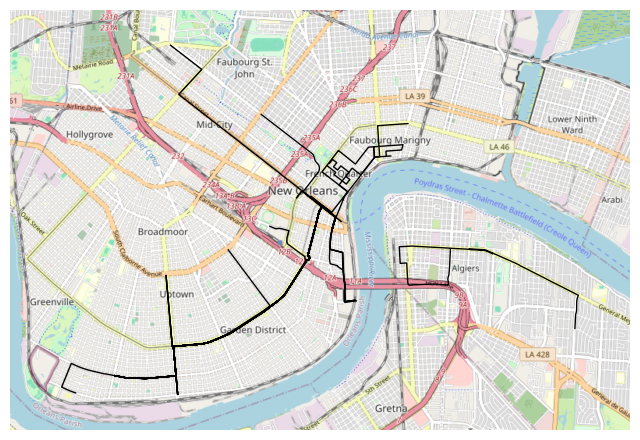

In [10]:
ax = gplt.webmap(data, projection=gcrs.WebMercator())
gplt.polyplot(data,ax=ax)

In [11]:
dataToilet = gpd.read_file(f"{path}toiletLocation.geojson")

<GeoAxes: >

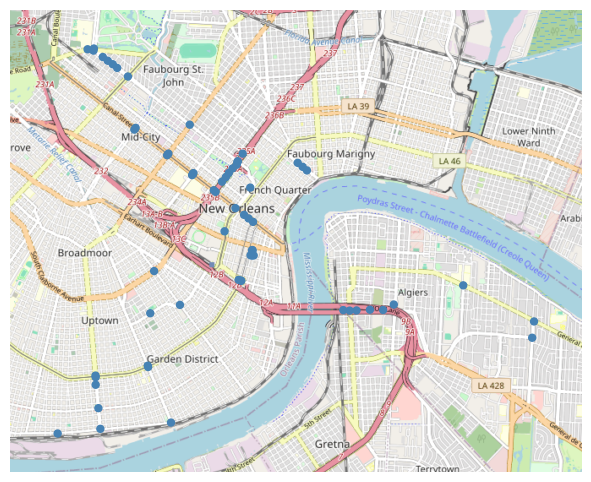

In [12]:
ax = gplt.webmap(dataToilet, projection=gcrs.WebMercator())
gplt.pointplot(dataToilet,ax=ax)

In [13]:
dataFirstAid = gpd.read_file(f"{path}firstAidLocations.geojson")

<GeoAxes: >

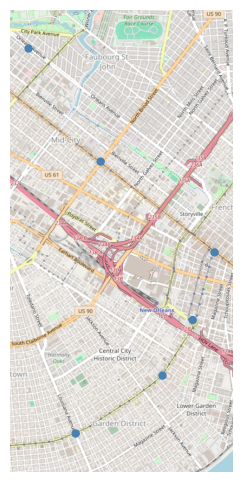

In [14]:
ax = gplt.webmap(dataFirstAid, projection=gcrs.WebMercator())
gplt.pointplot(dataFirstAid,ax=ax)

In [15]:
dataStreets = gpd.read_file(f"{path}streets.geojson")

In [16]:
dataStreets.head()

,munileft,mtfcc,strtetype,maintby,centerlineid,stateright,fromleft,joinid,roadlevel,lasteditor,...,ctyroute,astrtetype,msagleft,fedrtetype,afedrte,inwater,toleft,shape_stlength,fullnameabv,geometry
0,New Orleans,None,None,None,2501358,LA,6200,460,None,CMARD,...,None,None,None,None,None,None,6298,374.69106670567925,Constance St,"MULTILINESTRING ((-90.12482 29.92233, -90.1249..."
1,New Orleans,None,None,None,2507761,LA,2600,873,None,CMARD,...,None,None,None,None,None,None,2698,351.09598315083429,Hamilton St,"MULTILINESTRING ((-90.1272 29.96419, -90.12711..."
2,New Orleans,None,None,None,2510743,LA,0,671,None,CMARD,...,None,None,None,None,None,None,0,50.711363770514147,Encampment St,"MULTILINESTRING ((-90.08325 29.99944, -90.0832..."
3,New Orleans,None,None,None,2515776,LA,5461,1732,None,DBALBERT,...,None,None,None,None,None,None,5499,165.29887948728282,N Rampart St,"MULTILINESTRING ((-90.01771 29.96031, -90.0172..."
4,New Orleans,None,None,None,2522988,LA,10701,1704,None,CMARD,...,None,None,None,None,None,None,10731,252.75257190809734,Prentiss Ave,"MULTILINESTRING ((-89.96195 30.0232, -89.96185..."


In [17]:
dataStreets.shape

(28523, 39)

<GeoAxes: >

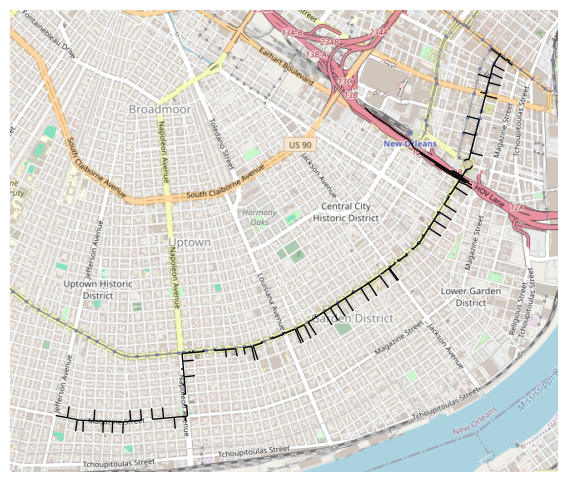

In [18]:
mask = dataStreets.intersects(data.loc[0,'geometry'])

ax = gplt.webmap(dataStreets[mask], projection=gcrs.WebMercator())
gplt.polyplot(dataStreets[mask], ax=ax)


In [19]:
dataStreets.columns

Index(['munileft', 'mtfcc', 'strtetype', 'maintby', 'centerlineid',
       'stateright', 'fromleft', 'joinid', 'roadlevel', 'lasteditor',
       'zipleft', 'roadclass', 'astrte', 'afedrtetype', 'lastupdate',
       'esnleft', 'objectid', 'fromright', 'esnright', 'ownedby', 'fullname',
       'onewaydir', 'toright', 'stroute', 'stateleft', 'zipright', 'fedroute',
       'muniright', 'msagright', 'ctyroute', 'astrtetype', 'msagleft',
       'fedrtetype', 'afedrte', 'inwater', 'toleft', 'shape_stlength',
       'fullnameabv', 'geometry'],
      dtype='object')

In [20]:
 pietyMask = dataStreets['fullnameabv'] == 'Piety Dr'

<GeoAxes: >

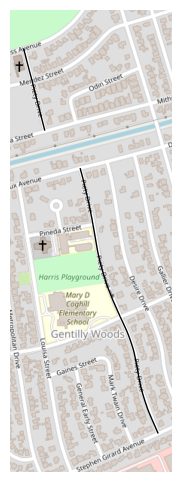

In [21]:
ax = gplt.webmap(dataStreets[pietyMask], projection=gcrs.WebMercator())
gplt.polyplot(dataStreets[pietyMask], ax=ax)

In [22]:
paradeStreets = dataStreets['fullnameabv'].isin( dataStreets[mask]['fullnameabv'].unique() )

In [23]:
data.columns

Index(['location', 'numfloats', 'formation', 'disband', 'objectid', 'date',
       'time', 'parade', 'shape_stlength', 'day', 'geometry'],
      dtype='object')

In [24]:
data['location'].unique

<bound method Series.unique of 0        Uptown
1        Uptown
2      Downtown
3        Uptown
4        Uptown
5        Uptown
6        Uptown
7        Uptown
8        Uptown
9        Uptown
10     Downtown
11       Uptown
12       Uptown
13       Uptown
14       Uptown
15     Downtown
16       Uptown
17      Midcity
18       Uptown
19       Uptown
20       Uptown
21       Uptown
22       Uptown
23       Uptown
24     Downtown
25       Uptown
26       Uptown
27       Uptown
28       Uptown
29       Uptown
30       Uptown
31       Uptown
32    West Bank
33       Uptown
34       Uptown
35       Uptown
36       Uptown
Name: location, dtype: object>

In [25]:
data['date']

0    2026-02-15 11:45:00+00:00
1    2026-02-12 16:30:00+00:00
2    2026-01-31 19:00:00+00:00
3    2026-02-07 17:30:00+00:00
4    2026-02-07 15:30:00+00:00
5    2026-02-17 11:00:00+00:00
6    2026-02-13 18:30:00+00:00
7    2026-02-12 18:15:00+00:00
8    2026-02-06 18:00:00+00:00
9    2026-02-14 12:00:00+00:00
10   2026-01-30 19:00:00+00:00
11   2026-02-06 17:00:00+00:00
12   2026-02-14 11:00:00+00:00
13   2026-02-12 17:30:00+00:00
14   2026-02-08 12:30:00+00:00
15   2026-02-08 13:00:00+00:00
16   2026-02-07 00:30:00+00:00
17   2026-02-14 16:00:00+00:00
18   2026-02-13 19:00:00+00:00
19   2026-02-07 11:30:00+00:00
20   2026-02-08 11:00:00+00:00
21   2026-02-17 10:30:00+00:00
22   2026-02-07 14:00:00+00:00
23   2026-02-16 17:15:00+00:00
24   2026-01-23 19:00:00+00:00
25   2026-02-17 11:30:00+00:00
26   2026-02-15 11:00:00+00:00
27   2026-02-15 12:00:00+00:00
28   2026-02-16 18:00:00+00:00
29   2026-02-11 18:15:00+00:00
30   2026-02-15 17:15:00+00:00
31   2026-02-07 18:15:00+00:00
32   202

In [26]:
dataStreets.columns

Index(['munileft', 'mtfcc', 'strtetype', 'maintby', 'centerlineid',
       'stateright', 'fromleft', 'joinid', 'roadlevel', 'lasteditor',
       'zipleft', 'roadclass', 'astrte', 'afedrtetype', 'lastupdate',
       'esnleft', 'objectid', 'fromright', 'esnright', 'ownedby', 'fullname',
       'onewaydir', 'toright', 'stroute', 'stateleft', 'zipright', 'fedroute',
       'muniright', 'msagright', 'ctyroute', 'astrtetype', 'msagleft',
       'fedrtetype', 'afedrte', 'inwater', 'toleft', 'shape_stlength',
       'fullnameabv', 'geometry'],
      dtype='object')

In [27]:
dataStreets['roadclass'].unique()

array(['Local', 'Major Arterial', 'Other', 'Umimproved', 'Ramp',
       'Freeway', 'Minor Arterial', None], dtype=object)

In [28]:
data = gpd.read_file("datasets/MississippiRiver.zip")

/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.13/site-packages/pyogrio/raw.py:200: RuntimeWarning: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection.
  return ogr_read(
/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.13/site-packages/pyogrio/raw.py:200: RuntimeWarning: Geometry of polygon of fid 3 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon.
  return ogr_read(
/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.13/site-packages/pyogrio/raw.py:200: RuntimeWarning: Geometry of polygon of fid 4 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon.
  return ogr_read(
/home/g/.local/share/virtualenvs/MardiGrasMaps-hKReYjzI/lib/python3.13/site-packages/pyogrio/raw.py:200: RuntimeWarning: Geometry of polygon of fid 5

In [29]:
groups = dataStreets.groupby(['fullnameabv','roadclass'])

In [30]:
outData = groups.apply(lambda df: shapely.ops.unary_union( df['geometry'] ), include_groups=False )

In [31]:
outData

fullnameabv     roadclass
10th St         Local        MULTILINESTRING ((-90.116232175619 29.99985101...
12th St         Local        MULTILINESTRING ((-90.119215749575 30.00082650...
14th St         Local        MULTILINESTRING ((-90.118915110425 30.00163629...
16th St         Local        MULTILINESTRING ((-90.118854599883 30.00246535...
18th St         Local        MULTILINESTRING ((-90.115983705612 30.00312910...
                                                   ...                        
Zircon St       Local        MULTILINESTRING ((-90.107711594126 30.02096346...
d'Abadie St     Local        MULTILINESTRING ((-90.073155728769 29.98038635...
d'Hemecourt St  Local        MULTILINESTRING ((-90.10979770695 29.973833572...
de Armas St     Local        MULTILINESTRING ((-90.023042667077 29.94271664...
de Battista Pl  Local        LINESTRING (-90.010514550399 29.94005173434, -...
Length: 2547, dtype: object